In [6]:
!pip install yfinance mplfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
ticker = "AAPL"

data = yf.download(ticker, start = "2020-01-01", end = "2025-01-01")

/tmp/ipython-input-179569636.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = "2020-01-01", end = "2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [3]:
data['SMA_20'] = data['Close'].rolling(20).mean()
data['SMA_50'] = data['Close'].rolling(50).mean()
data[['Close', 'SMA_20', 'SMA_50']].tail()

Price,Close,SMA_20,SMA_50
Ticker,AAPL,,
Date,,,
2024-12-24,257.037476,245.184590,234.761246
2024-12-26,257.853760,246.377194,235.267496
2024-12-27,254.439209,247.405543,235.746623
2024-12-30,251.064484,248.145694,236.150897
2024-12-31,249.292511,248.684756,236.463051


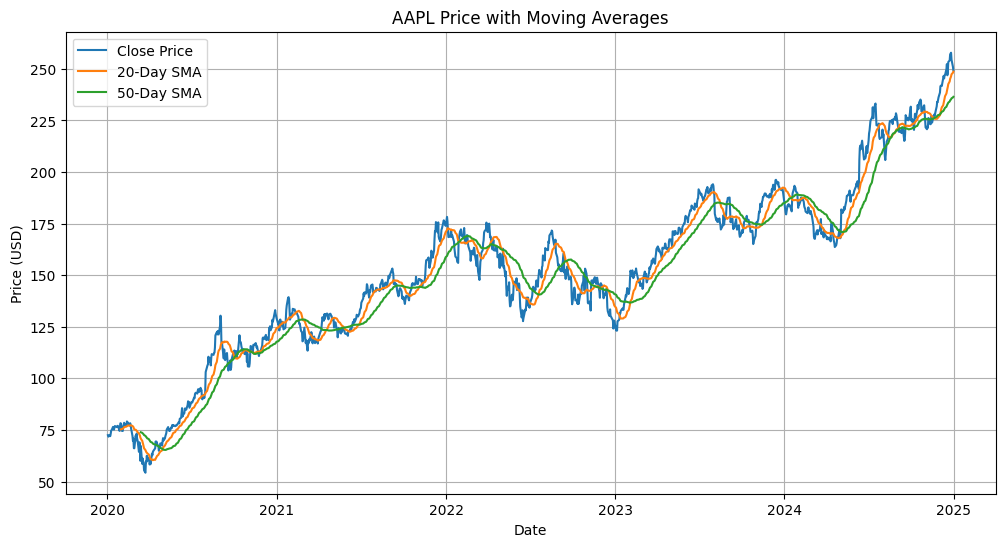

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label = 'Close Price')
plt.plot(data['SMA_20'], label = '20-Day SMA')
plt.plot(data['SMA_50'], label = '50-Day SMA')

plt.title(f'{ticker} Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
data['Daily_Return'] = data['Close'].pct_change()
volatility = data['Daily_Return'].std()
volatility

0.019955659927290016

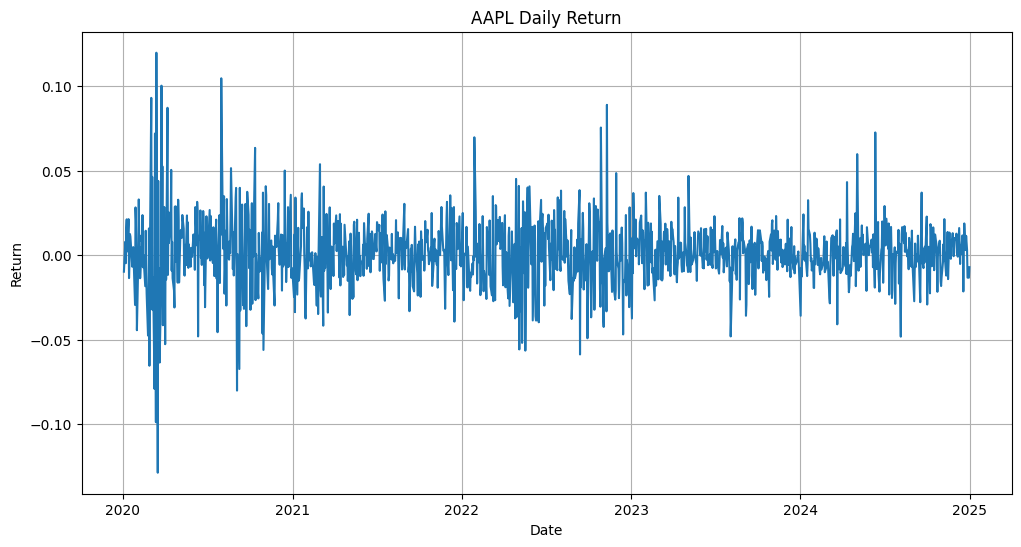

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data['Daily_Return'], label = 'Daily Return')
plt.title(f'{ticker} Daily Return')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.show()